In [70]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.neighbors import NearestNeighbors

# Data Preprocessing

In [3]:
df = pd.read_csv("spotify_data.csv")

In [4]:
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [6]:
df.shape

(1159764, 20)

In [7]:
df.isnull().sum()

Unnamed: 0           0
artist_name         15
track_name           1
track_id             0
popularity           0
year                 0
genre                0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
dtype: int64

In [8]:
df = df.drop(['Unnamed: 0','track_id'], axis = 1)

In [9]:
df.dropna(inplace = True)

In [10]:
df['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

In [11]:
len(df.loc[df['genre'] == 'rock', 'genre'])

3319

In [12]:
df.loc[df['genre'].isin(['rock-n-roll', 'alt-rock']), 'genre'] = 'rock'

In [13]:
len(df.loc[df['genre'] == 'rock', 'genre'])

40128

In [14]:
len(df.loc[df['genre'] == 'electronic', 'genre'])

9369

In [15]:
df.loc[df['genre'].isin(['electro', 'edm']), 'genre'] = 'electronic'

In [16]:
len(df.loc[df['genre'] == 'electronic', 'genre'])

31446

In [17]:
genre_new = ['classical', 'pop', 'rock', 'hip-hop', 'electronic', 'folk'] #6 most prominent genres

In [18]:
def toEnglish(s):
    return re.match(r'^[A-Za-z\sÉéöü,.\-!?0-9]+$', s) is not None

In [34]:
df = df[df['genre'].isin(genre_new)]
df = df[df['duration_ms'] <= 1800000]
df = df[df['artist_name'].apply(toEnglish) & df['track_name'].apply(toEnglish)]

In [36]:
print(f"Total number of songs: {df.shape[0]}")

Total number of songs: 86593


# Exploratory Data Analysis

In [39]:
cols = list(df.columns)
features = cols[2:]
features.remove('genre')
features

['popularity',
 'year',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

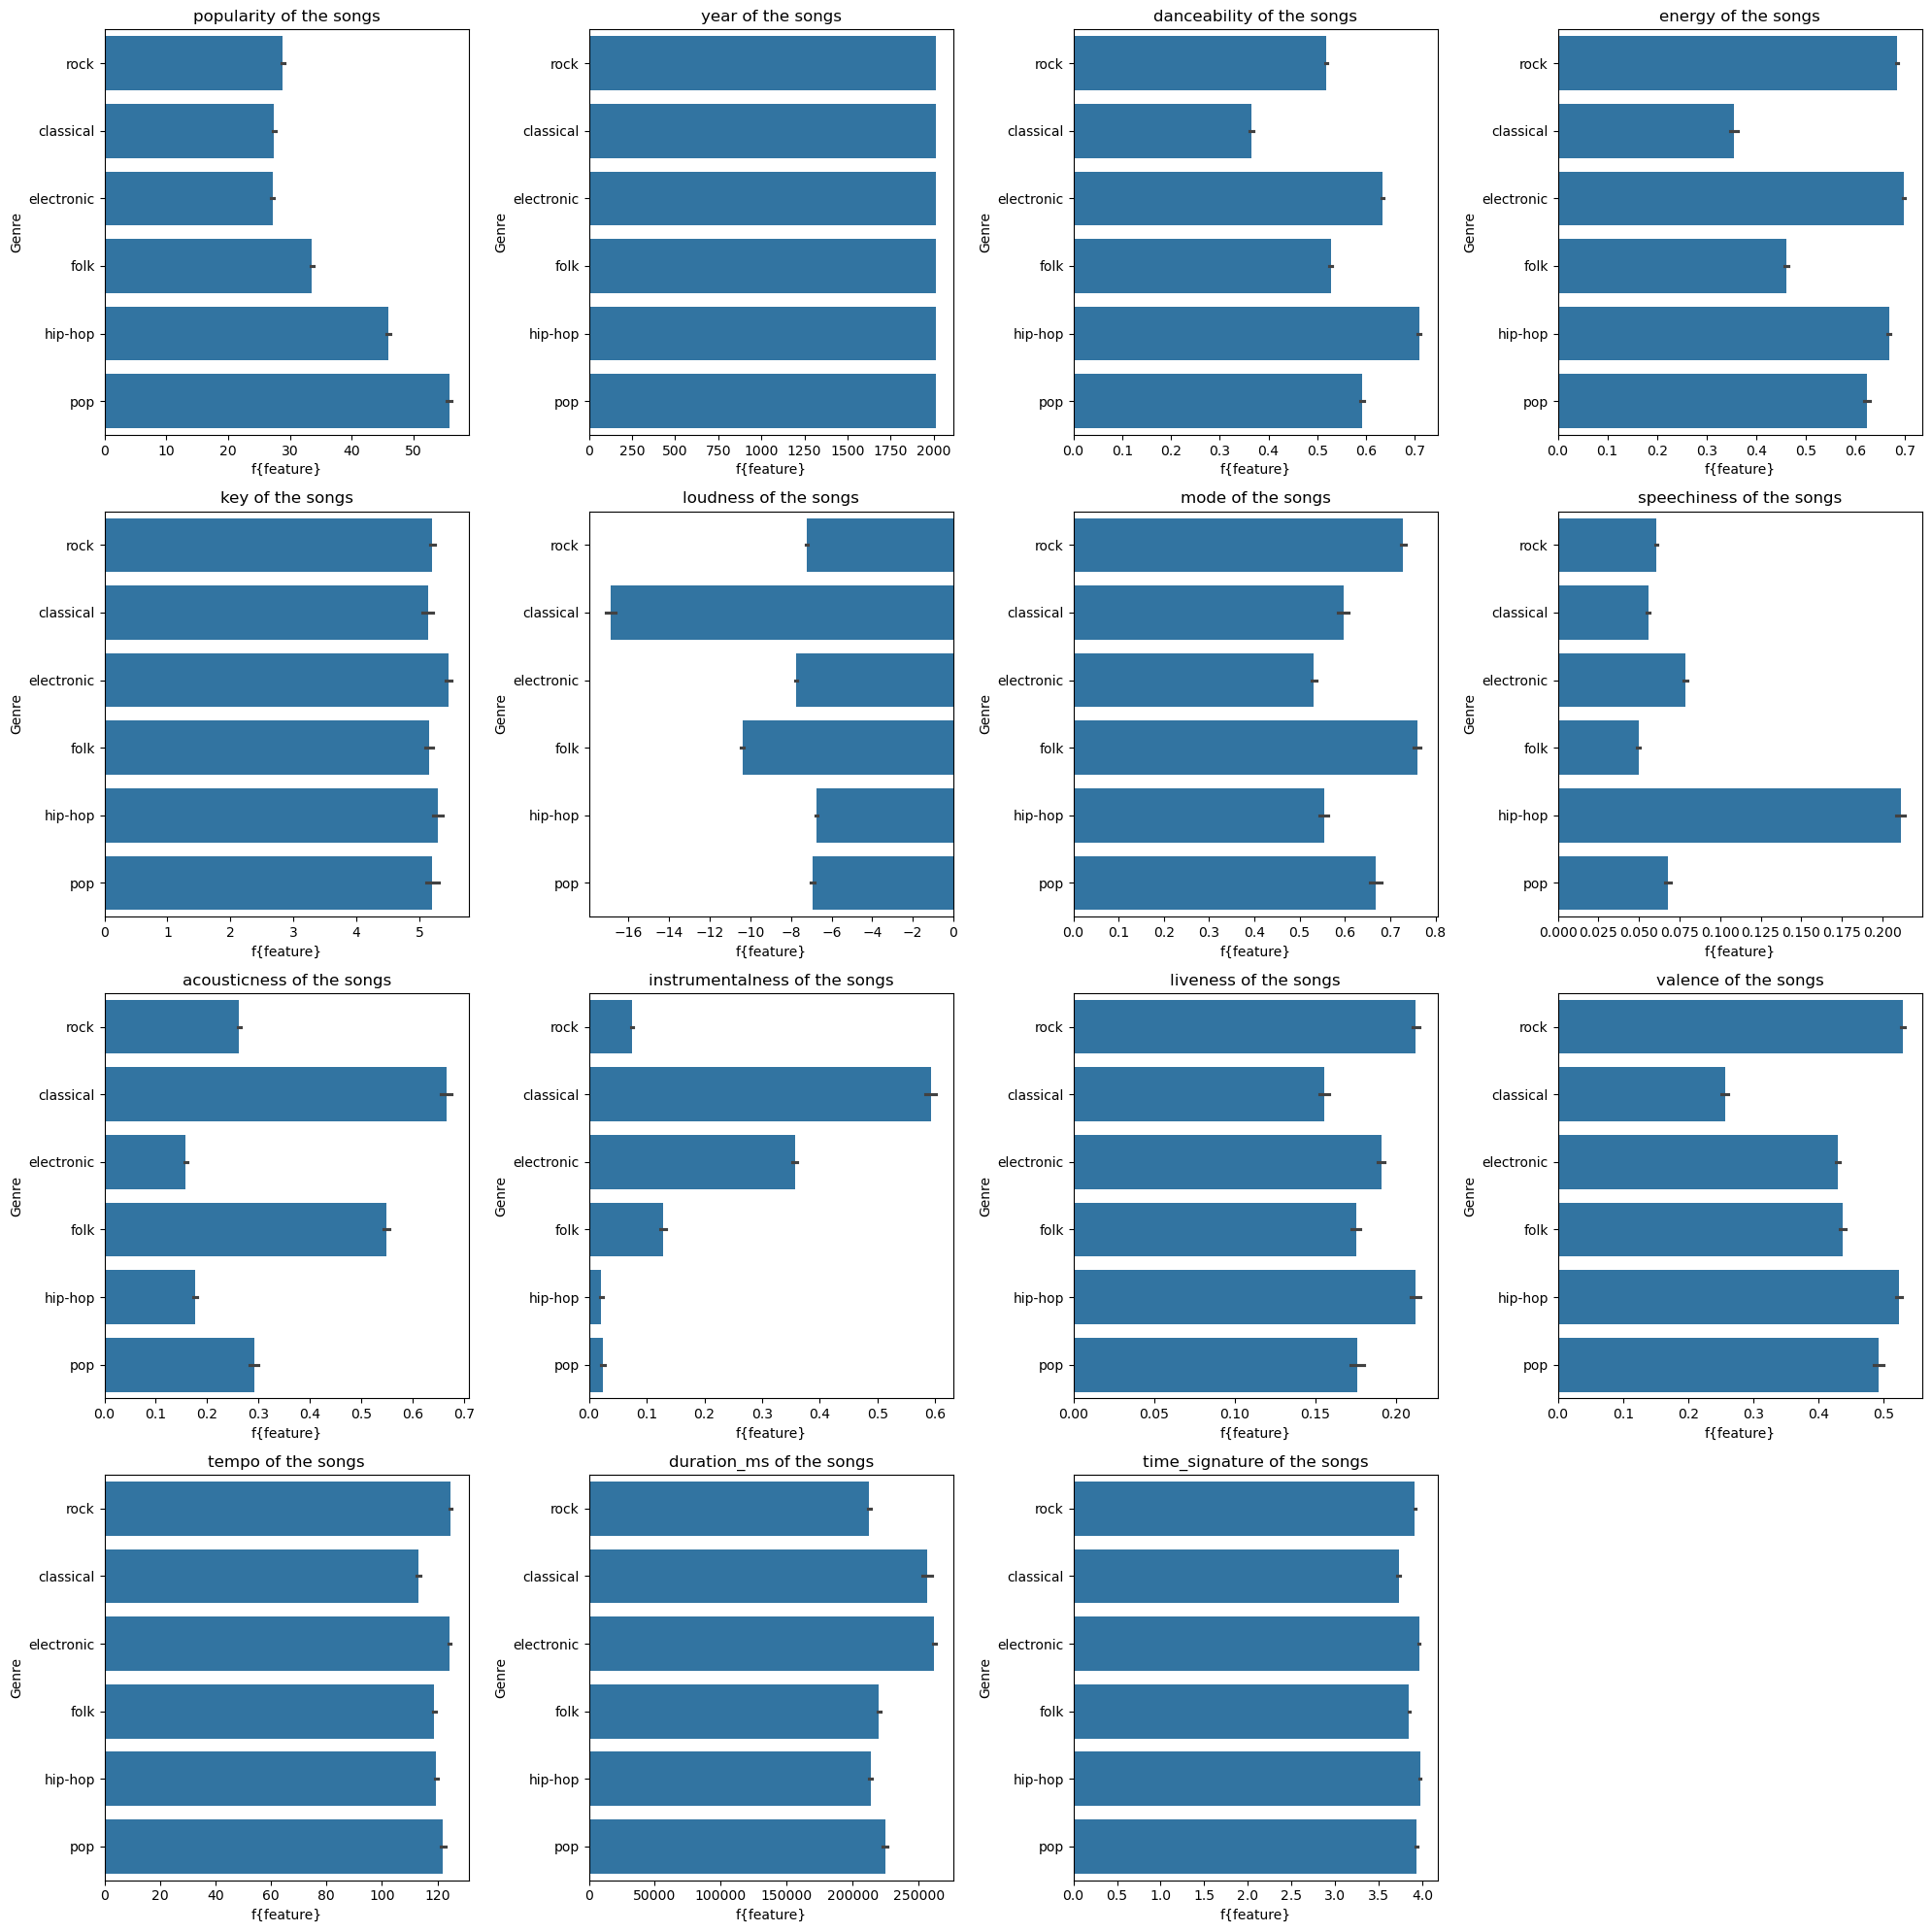

In [41]:
rows = 4
cols = (len(features) + rows - 1) // rows

fig, axes = plt.subplots(rows, cols, figsize = (20, 20))
for i, feature in enumerate(features):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sb.barplot(y = 'genre', x = feature, data = df, ax = ax)
    ax.set_title(f'{feature} of the songs')
    ax.set_xlabel('f{feature}')
    ax.set_ylabel('Genre')

if len(features) < rows * cols:
    for i in range(len(features), rows * cols):
        fig.delaxes(axes.flatten()[i])
        
plt.tight_layout()
plt.show()

Year, Key, Tempo, Duration_ms, and Time_signature are not helpful to distinguish the genre of the songs

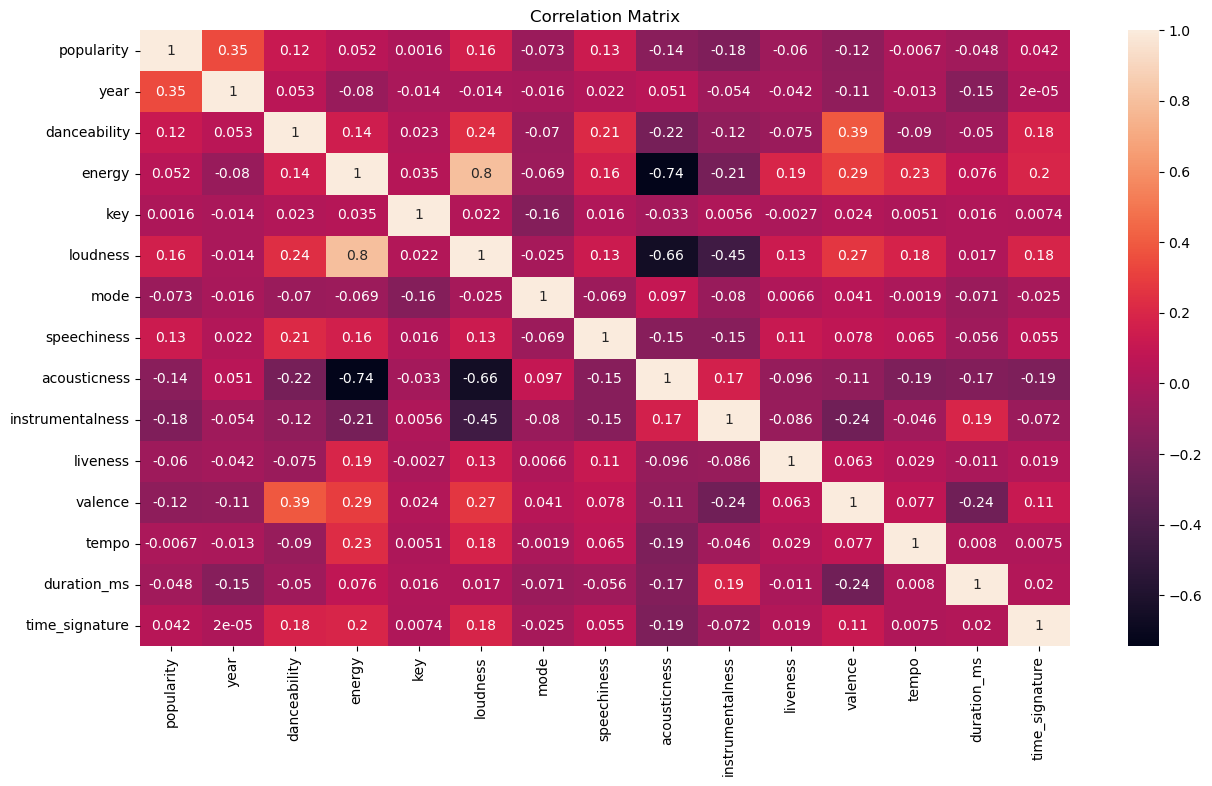

In [43]:
plt.figure(figsize = (15, 8))
sb.heatmap(df[features].corr(), annot = True, cbar = True)
plt.title("Correlation Matrix")
plt.show()

Three noticable correlations between variables:
- Engergy <-> Loudness: 0.8
- Engergy <-> Acousticness: -0.74
- Loudness <-> Acoustincess: -0.66

Energy and Loudness are similar. Either one of them has to be removed or it could cause multicollinearity problem. In this case, loudness will be removed

In [45]:
for col in ('year', 'key', 'tempo', 'duration_ms', 'time_signature', 'loudness'):
    if col in features:
        features.remove(col)

In [46]:
X = df[features]
df = df.reset_index(drop = True)

In [47]:
X.shape

(86593, 9)

# Model Building

In [68]:
knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
knn.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine')

In [50]:
def recommend(track_name, k = 5):
    idx = df.index[df['track_name'] == track_name][0]
    vec = X.iloc[[idx]]
    distance, indices = knn.kneighbors(vec, n_neighbors = k + 1)

    recs = df.iloc[indices[0][1:]].copy()  
    recs['similarity'] = 1 - distance[0][1:] 
    return recs[['track_name', 'genre', 'artist_name', 'similarity']].reset_index(drop = True)


In [51]:
def random_seed(df):
    return df.sample(n = 1).iloc[0]['track_name']

In [52]:
recommend(random_seed(df))

,track_name,genre,artist_name,similarity
0,Lost It All,rock,Black Veil Brides,0.999998
1,To All of You,folk,Syd Matters,0.999997
2,Golden,pop,Harry Styles,0.999997
3,I Am the Highway,rock,Audioslave,0.999996
4,Perfect,pop,Selena Gomez,0.999995
